Your implementation - Median: 0.0009, IQR: 1.9050
Scipy implementation - Median: 0.0020, IQR: 1.9041


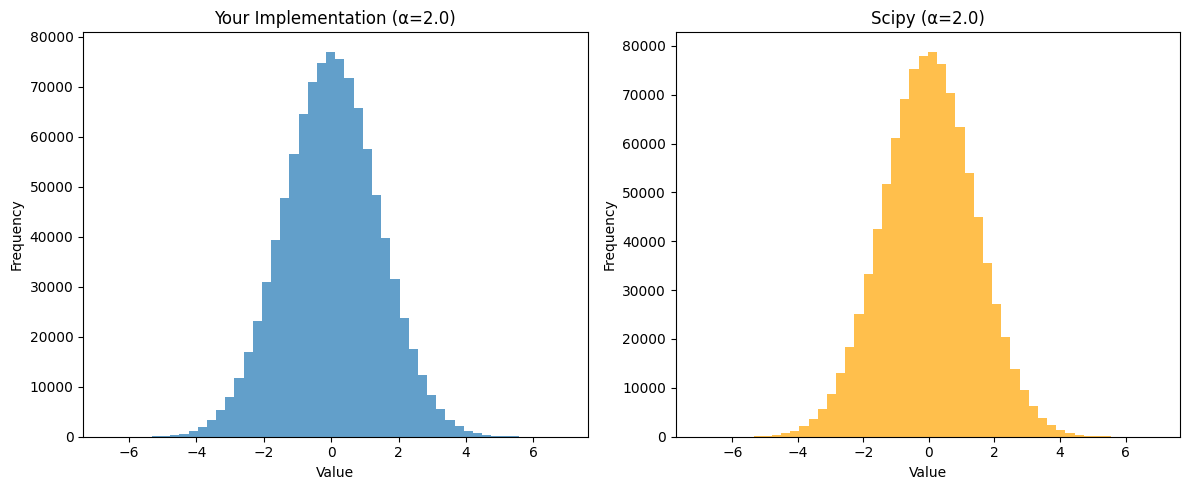

In [5]:
from scipy.stats import levy_stable
import numpy as np
from cssm._utils import draw_random_stable, set_seed

# Compare your implementation with scipy
set_seed(44)
alpha = 2.0

# Your implementation
your_samples = np.asarray(draw_random_stable(1000000, alpha))

# Scipy implementation (β=0 for symmetric, default parameterization)
scipy_samples = levy_stable.rvs(alpha=alpha, beta=0, scale = 1, size=1000000, random_state=42)

# Compare distributions
print(f"Your implementation - Median: {np.median(your_samples):.4f}, IQR: {np.percentile(your_samples, 75) - np.percentile(your_samples, 25):.4f}")
print(f"Scipy implementation - Median: {np.median(scipy_samples):.4f}, IQR: {np.percentile(scipy_samples, 75) - np.percentile(scipy_samples, 25):.4f}")

# Visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(np.clip(your_samples, -10, 10), bins=50, alpha=0.7, label='Your implementation')
plt.title(f'Your Implementation (α={alpha})')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(np.clip(scipy_samples, -10, 10), bins=50, alpha=0.7, label='Scipy', color='orange')
plt.title(f'Scipy (α={alpha})')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

STATISTICAL PROPERTIES COMPARISON

Generating 1,000,000 samples from each method...

STATISTICAL PROPERTIES

Your Implementation (Marsaglia Polar):
  Mean:     -0.001146  (expected: 0.000000)
  Std Dev:  0.999073  (expected: 1.000000)
  Skewness: -0.001897  (expected: 0.000000)
  Kurtosis: -0.003913  (expected: 0.000000)
  Min:      -4.933082
  Max:      4.614404

NumPy New (Ziggurat):
  Mean:     0.000098  (expected: 0.000000)
  Std Dev:  1.000483  (expected: 1.000000)
  Skewness: -0.001070  (expected: 0.000000)
  Kurtosis: 0.009753  (expected: 0.000000)
  Min:      -4.928238
  Max:      5.007235

NumPy Old (Box-Muller/Marsaglia):
  Mean:     -0.001600  (expected: 0.000000)
  Std Dev:  1.000188  (expected: 1.000000)
  Skewness: -0.001350  (expected: 0.000000)
  Kurtosis: -0.005631  (expected: 0.000000)
  Min:      -4.829436
  Max:      4.678949

KOLMOGOROV-SMIRNOV TEST (vs. Standard Normal)
Your Implementation (Marsaglia Polar):
  KS Statistic: 0.000850  (closer to 0 is better)
  P-va

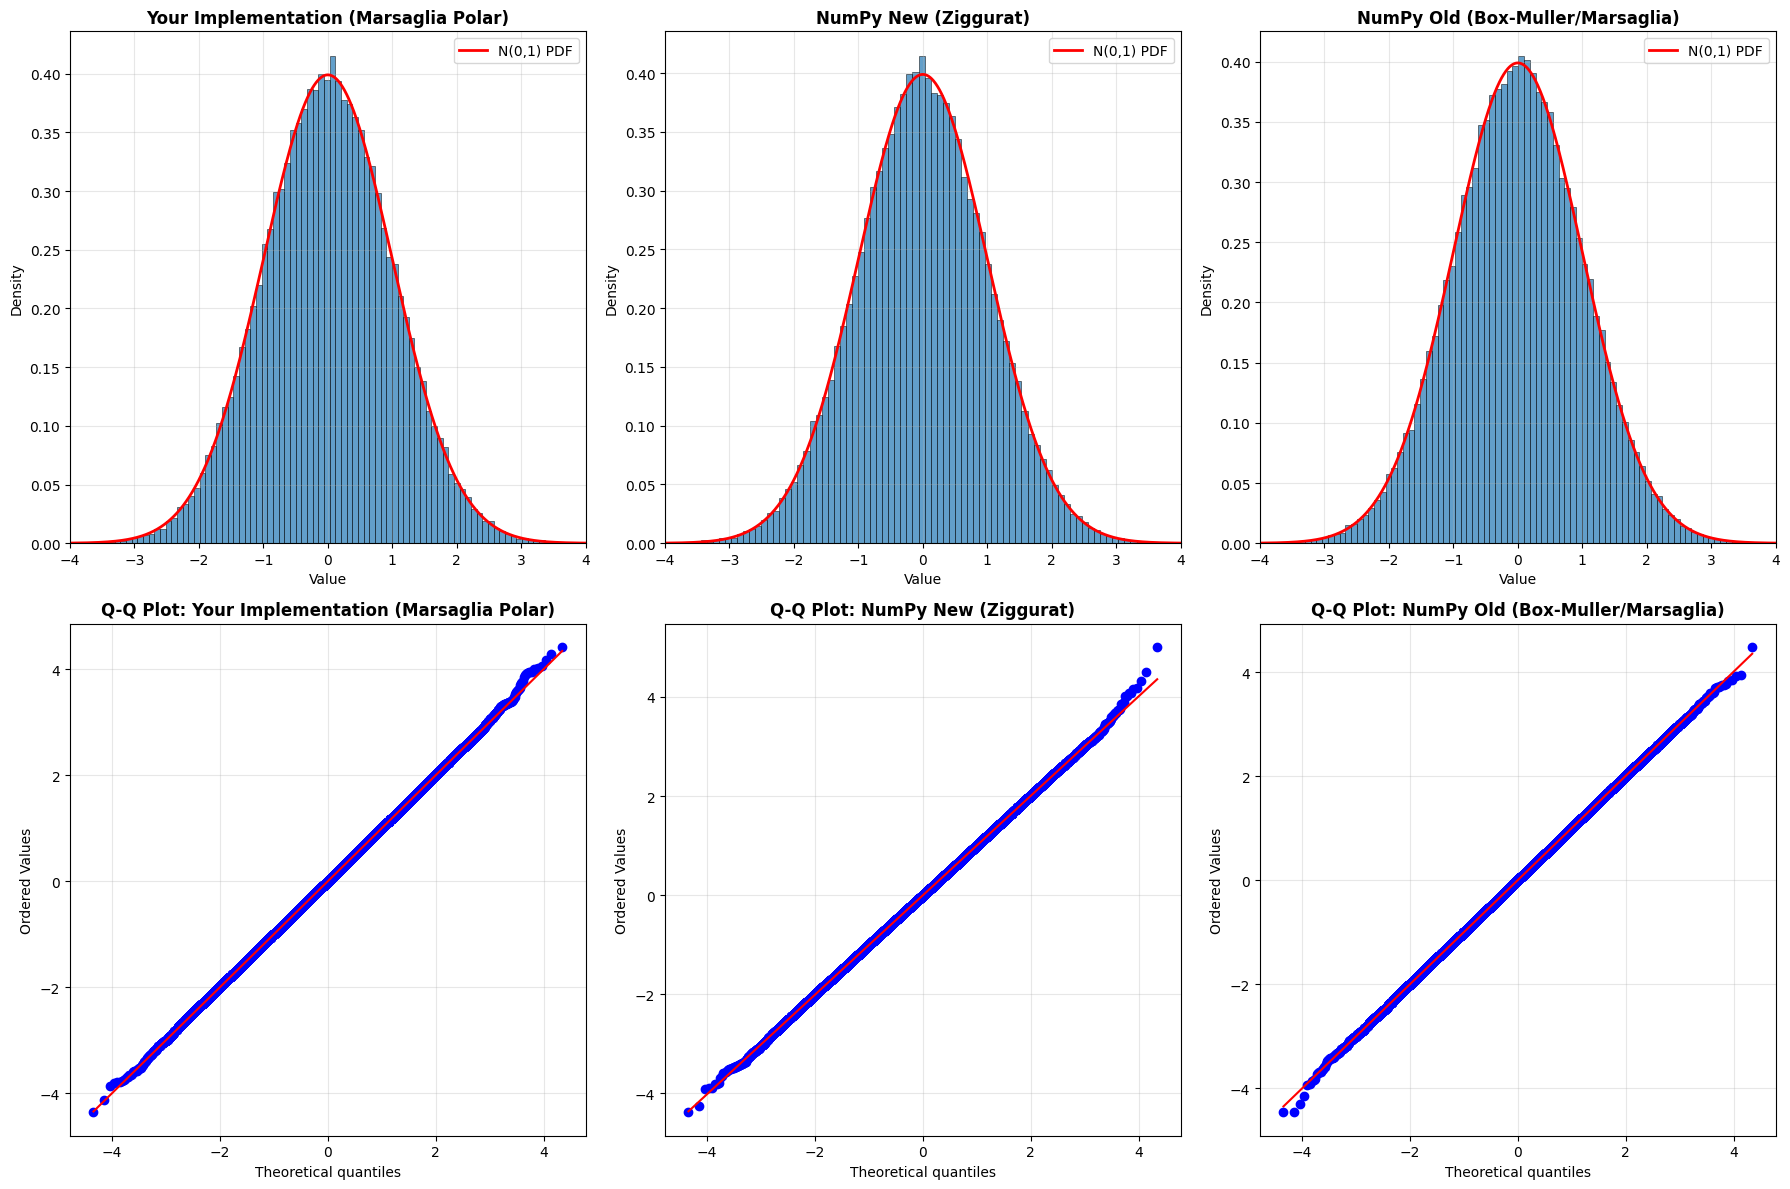


TAIL BEHAVIOR ANALYSIS

Quantile   Theoretical  Your Impl.   NumPy New    NumPy Old   
----------------------------------------------------------------------
0.001        -3.090232   -3.085046   -3.095788   -3.077568
0.010        -2.326348   -2.323874   -2.330290   -2.330265
0.100        -1.281552   -1.282400   -1.281600   -1.281996
0.900         1.281552    1.279746    1.281519    1.280980
0.990         2.326348    2.317491    2.327961    2.324138
0.999         3.090232    3.087698    3.089960    3.080352

INDEPENDENCE TEST (Marsaglia Polar generates pairs)

Correlation between paired samples: 0.006928
Expected: ~0.000000 (should be independent)
Saved pair scatter plot to 'gaussian_pairs_scatter.png'


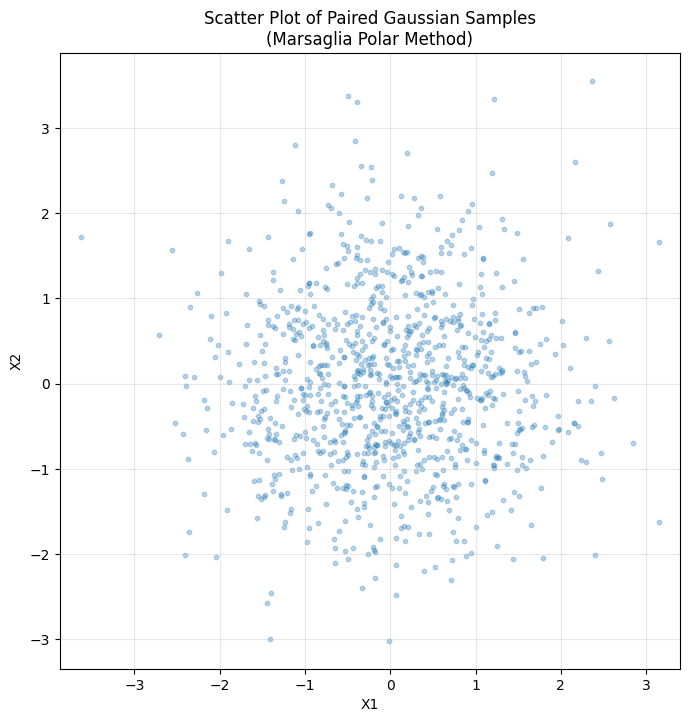


TESTS COMPLETE


In [8]:
import numpy as np
import time
from cssm._utils import random_gaussian, draw_gaussian, set_seed
import matplotlib.pyplot as plt
from scipy import stats

# ==============================================================================
# Test 1: Statistical Properties Comparison
# ==============================================================================

print("=" * 70)
print("STATISTICAL PROPERTIES COMPARISON")
print("=" * 70)

# Set seed for reproducibility
set_seed(42)
np.random.seed(42)
rng = np.random.default_rng(42)

n_samples = 1_000_000

# Generate samples using different methods
print(f"\nGenerating {n_samples:,} samples from each method...")

# Your Marsaglia polar method (batch)
start = time.perf_counter()
your_samples_batch = np.asarray(draw_gaussian(n_samples))
your_time_batch = time.perf_counter() - start

# Your Marsaglia polar method (single calls)
set_seed(42)
start = time.perf_counter()
your_samples_single = np.array([random_gaussian() for _ in range(10000)])
your_time_single = time.perf_counter() - start

# NumPy new (Ziggurat)
start = time.perf_counter()
numpy_new_samples = rng.standard_normal(n_samples)
numpy_new_time = time.perf_counter() - start

# NumPy old (legacy Box-Muller/Marsaglia)
start = time.perf_counter()
numpy_old_samples = np.random.randn(n_samples)
numpy_old_time = time.perf_counter() - start

# Statistical tests
print("\n" + "=" * 70)
print("STATISTICAL PROPERTIES")
print("=" * 70)

methods = {
    "Your Implementation (Marsaglia Polar)": your_samples_batch,
    "NumPy New (Ziggurat)": numpy_new_samples,
    "NumPy Old (Box-Muller/Marsaglia)": numpy_old_samples,
}

for name, samples in methods.items():
    print(f"\n{name}:")
    print(f"  Mean:     {np.mean(samples):8.6f}  (expected: 0.000000)")
    print(f"  Std Dev:  {np.std(samples):8.6f}  (expected: 1.000000)")
    print(f"  Skewness: {stats.skew(samples):8.6f}  (expected: 0.000000)")
    print(f"  Kurtosis: {stats.kurtosis(samples):8.6f}  (expected: 0.000000)")
    print(f"  Min:      {np.min(samples):8.6f}")
    print(f"  Max:      {np.max(samples):8.6f}")

# Kolmogorov-Smirnov test against standard normal
print("\n" + "=" * 70)
print("KOLMOGOROV-SMIRNOV TEST (vs. Standard Normal)")
print("=" * 70)

for name, samples in methods.items():
    ks_stat, p_value = stats.kstest(samples, 'norm')
    print(f"{name}:")
    print(f"  KS Statistic: {ks_stat:.6f}  (closer to 0 is better)")
    print(f"  P-value:      {p_value:.6f}  (>0.05 means no significant difference)")

# ==============================================================================
# Test 2: Performance Comparison
# ==============================================================================

print("\n" + "=" * 70)
print("PERFORMANCE COMPARISON")
print("=" * 70)

print(f"\nGenerating {n_samples:,} samples:")
print(f"  Your Marsaglia (batch):    {your_time_batch:.4f}s  (1.00x baseline)")
print(f"  NumPy New (Ziggurat):      {numpy_new_time:.4f}s  ({numpy_new_time/your_time_batch:.2f}x)")
print(f"  NumPy Old (Box-Muller):    {numpy_old_time:.4f}s  ({numpy_old_time/your_time_batch:.2f}x)")

print(f"\nGenerating 10,000 samples (single calls):")
print(f"  Your Marsaglia (single):   {your_time_single:.4f}s  ({your_time_single/(your_time_batch*10000/n_samples):.2f}x slower than batch)")

# ==============================================================================
# Test 3: Distribution Visualization
# ==============================================================================

print("\n" + "=" * 70)
print("GENERATING VISUALIZATIONS...")
print("=" * 70)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Subsample for visualization
vis_samples = 100000

# Plot histograms
for idx, (name, samples) in enumerate(methods.items()):
    row, col = idx // 3, idx % 3
    ax = axes[row, col]
    
    # Histogram
    counts, bins, _ = ax.hist(samples[:vis_samples], bins=100, 
                               alpha=0.7, density=True, 
                               edgecolor='black', linewidth=0.5)
    
    # Overlay theoretical normal distribution
    x = np.linspace(-4, 4, 1000)
    ax.plot(x, stats.norm.pdf(x), 'r-', linewidth=2, label='N(0,1) PDF')
    
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-4, 4)

# Q-Q plots
for idx, (name, samples) in enumerate(methods.items()):
    row, col = 1, idx
    ax = axes[row, col]
    
    # Q-Q plot
    stats.probplot(samples[:vis_samples], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {name}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gaussian_comparison.png', dpi=150, bbox_inches='tight')
print("Saved visualization to 'gaussian_comparison.png'")
plt.show()

# ==============================================================================
# Test 4: Tail Behavior Analysis
# ==============================================================================

print("\n" + "=" * 70)
print("TAIL BEHAVIOR ANALYSIS")
print("=" * 70)

# Check extreme quantiles
quantiles = [0.001, 0.01, 0.1, 0.9, 0.99, 0.999]
theoretical_quantiles = stats.norm.ppf(quantiles)

print(f"\n{'Quantile':<10} {'Theoretical':<12} {'Your Impl.':<12} {'NumPy New':<12} {'NumPy Old':<12}")
print("-" * 70)

for i, q in enumerate(quantiles):
    your_q = np.quantile(your_samples_batch, q)
    numpy_new_q = np.quantile(numpy_new_samples, q)
    numpy_old_q = np.quantile(numpy_old_samples, q)
    theo_q = theoretical_quantiles[i]
    
    print(f"{q:<10.3f} {theo_q:>11.6f} {your_q:>11.6f} {numpy_new_q:>11.6f} {numpy_old_q:>11.6f}")

# ==============================================================================
# Test 5: Correlation Test (for pairs)
# ==============================================================================

print("\n" + "=" * 70)
print("INDEPENDENCE TEST (Marsaglia Polar generates pairs)")
print("=" * 70)

# Generate pairs using your method
set_seed(42)
n_pairs = 50000
pairs = np.asarray(draw_gaussian(n_pairs * 2)).reshape(-1, 2)

# Check correlation between x1 and x2
correlation = np.corrcoef(pairs[:, 0], pairs[:, 1])[0, 1]
print(f"\nCorrelation between paired samples: {correlation:.6f}")
print(f"Expected: ~0.000000 (should be independent)")

# Scatter plot of pairs
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(pairs[:1000, 0], pairs[:1000, 1], alpha=0.3, s=10)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Scatter Plot of Paired Gaussian Samples\n(Marsaglia Polar Method)')
ax.grid(True, alpha=0.3)
ax.axis('equal')
plt.savefig('gaussian_pairs_scatter.png', dpi=150)
print("Saved pair scatter plot to 'gaussian_pairs_scatter.png'")
plt.show()

print("\n" + "=" * 70)
print("TESTS COMPLETE")
print("=" * 70)

### Timing the Actual Simulator

ALPHA-STABLE DISTRIBUTION: PERFORMANCE & CORRECTNESS COMPARISON

PART 1: PRIMITIVE FUNCTIONS (draw_random_stable)

Generating 1,000 samples (alpha=1.5):
  Old (C rand):     0.0001s  (baseline)
  NumPy:            0.0003s  ( 0.29x speedup)
  SciPy:            0.0004s  ( 0.22x speedup)

Generating 10,000 samples (alpha=1.5):
  Old (C rand):     0.0004s  (baseline)
  NumPy:            0.0003s  ( 1.61x speedup)
  SciPy:            0.0009s  ( 0.45x speedup)

Generating 100,000 samples (alpha=1.5):
  Old (C rand):     0.0041s  (baseline)
  NumPy:            0.0026s  ( 1.59x speedup)
  SciPy:            0.0089s  ( 0.46x speedup)

Generating 1,000,000 samples (alpha=1.5):
  Old (C rand):     0.0407s  (baseline)
  NumPy:            0.0273s  ( 1.49x speedup)
  SciPy:            0.0924s  ( 0.44x speedup)

PART 2: STATISTICAL CORRECTNESS

--- Alpha = 0.5 ---
  Old    - Median:  0.0024, IQR:  2.5279
  NumPy  - Median: -0.0001, IQR:  2.5336
  SciPy  - Median:  0.0013, IQR:  2.5525
  KS Test (Old vs 

/var/folders/gx/s43vynx550qbypcxm83fv56dzq4hgg/T/ipykernel_58916/2377183317.py:180: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Old vs NumPy: stat={float(ks_rt_numpy):.6f}, p={float(p_rt_numpy):.4f} "
/var/folders/gx/s43vynx550qbypcxm83fv56dzq4hgg/T/ipykernel_58916/2377183317.py:181: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f"({'✅' if float(p_rt_numpy) > 0.01 else '❌'})")
/var/folders/gx/s43vynx550qbypcxm83fv56dzq4hgg/T/ipykernel_58916/2377183317.py:182: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before p

Saved visualization to 'stable_distribution_comparison.png'

BENCHMARKING COMPLETE!


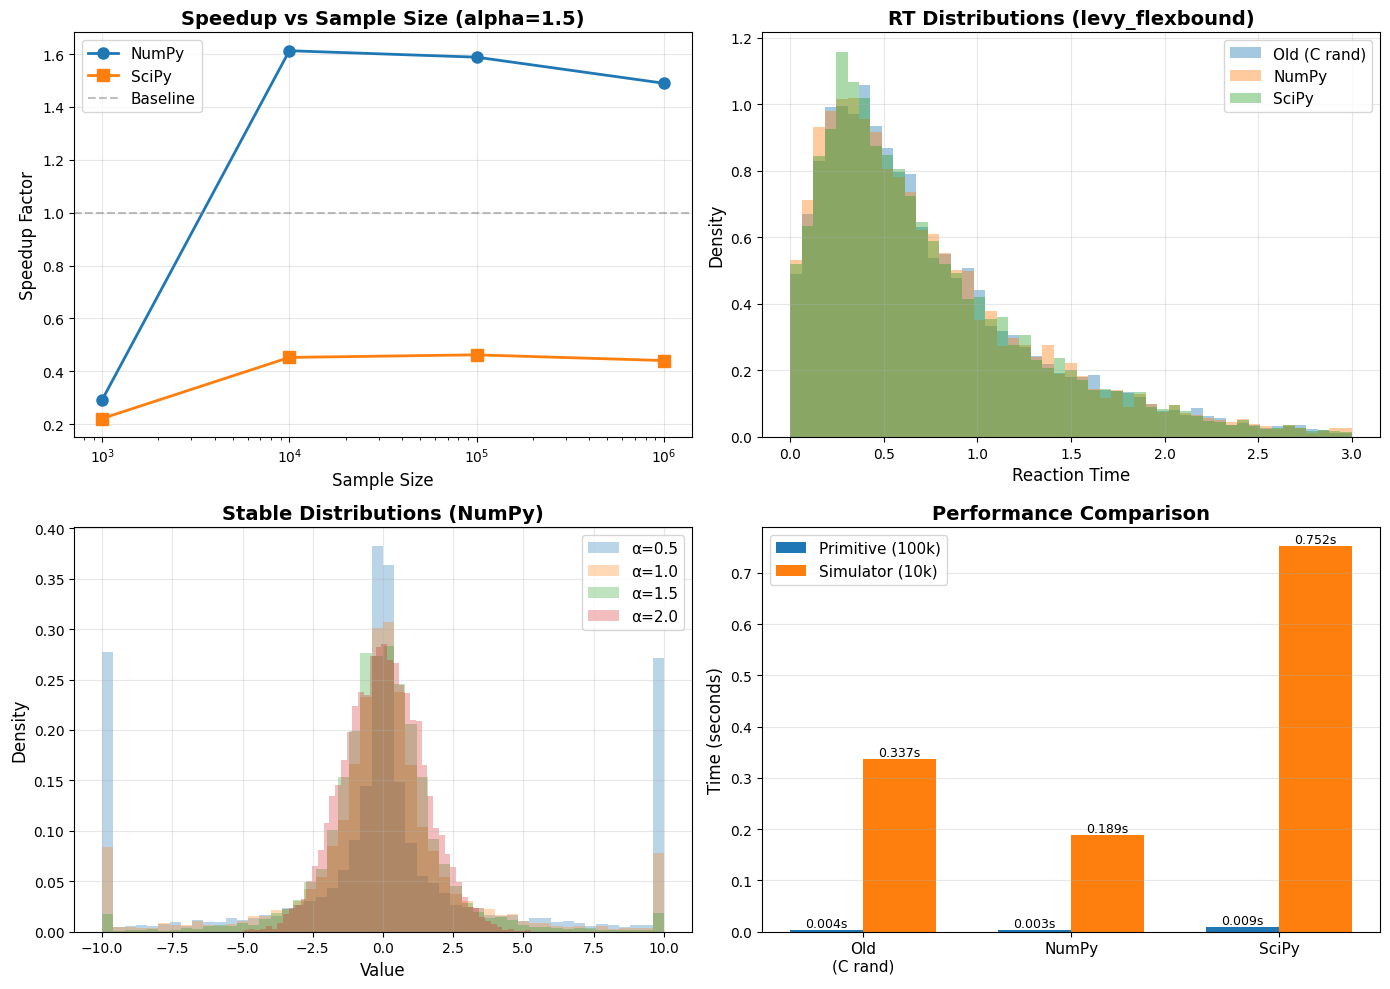

In [1]:
import numpy as np
import time
from scipy import stats
import matplotlib.pyplot as plt

# Import all three versions
from cssm._utils import (
    draw_random_stable, 
    draw_random_stable_numpy, 
    draw_random_stable_scipy,
    set_seed
)
from cssm import levy_flexbound, levy_flexbound_numpy, levy_flexbound_scipy

# Import boundary function
from ssms.basic_simulators.boundary_functions import constant as constant_boundary

print("=" * 80)
print("ALPHA-STABLE DISTRIBUTION: PERFORMANCE & CORRECTNESS COMPARISON")
print("=" * 80)

# ============================================================================
# PART 1: TEST PRIMITIVE FUNCTIONS (draw_random_stable)
# ============================================================================
print("\n" + "=" * 80)
print("PART 1: PRIMITIVE FUNCTIONS (draw_random_stable)")
print("=" * 80)

n_samples = 100_000
alpha = 1.5
test_alphas = [0.5, 1.0, 1.5, 2.0]

# Performance comparison across different sample sizes
sample_sizes = [1_000, 10_000, 100_000, 1_000_000]
results = {size: {} for size in sample_sizes}

for n in sample_sizes:
    print(f"\nGenerating {n:,} samples (alpha={alpha}):")
    
    # Original (C rand)
    set_seed(42)
    start = time.perf_counter()
    samples_old = np.asarray(draw_random_stable(n, alpha))
    time_old = time.perf_counter() - start
    results[n]['old'] = time_old
    
    # NumPy version
    start = time.perf_counter()
    samples_numpy = np.asarray(draw_random_stable_numpy(n, alpha))
    time_numpy = time.perf_counter() - start
    results[n]['numpy'] = time_numpy
    
    # SciPy version
    start = time.perf_counter()
    samples_scipy = np.asarray(draw_random_stable_scipy(n, alpha))
    time_scipy = time.perf_counter() - start
    results[n]['scipy'] = time_scipy
    
    print(f"  Old (C rand):     {time_old:.4f}s  (baseline)")
    print(f"  NumPy:            {time_numpy:.4f}s  ({time_old/time_numpy:5.2f}x speedup)")
    print(f"  SciPy:            {time_scipy:.4f}s  ({time_old/time_scipy:5.2f}x speedup)")

# ============================================================================
# PART 2: STATISTICAL CORRECTNESS
# ============================================================================
print("\n" + "=" * 80)
print("PART 2: STATISTICAL CORRECTNESS")
print("=" * 80)

n_test = 100_000

for alpha_test in test_alphas:
    print(f"\n--- Alpha = {alpha_test} ---")
    
    set_seed(42)
    samples_old = np.asarray(draw_random_stable(n_test, alpha_test))
    samples_numpy = np.asarray(draw_random_stable_numpy(n_test, alpha_test))
    samples_scipy = np.asarray(draw_random_stable_scipy(n_test, alpha_test))
    
    # Clip extreme values for better statistics
    clip_val = 10
    samples_old_clip = np.clip(samples_old, -clip_val, clip_val)
    samples_numpy_clip = np.clip(samples_numpy, -clip_val, clip_val)
    samples_scipy_clip = np.clip(samples_scipy, -clip_val, clip_val)
    
    # Basic statistics
    print(f"  Old    - Median: {np.median(samples_old_clip):7.4f}, "
          f"IQR: {np.percentile(samples_old_clip, 75) - np.percentile(samples_old_clip, 25):7.4f}")
    print(f"  NumPy  - Median: {np.median(samples_numpy_clip):7.4f}, "
          f"IQR: {np.percentile(samples_numpy_clip, 75) - np.percentile(samples_numpy_clip, 25):7.4f}")
    print(f"  SciPy  - Median: {np.median(samples_scipy_clip):7.4f}, "
          f"IQR: {np.percentile(samples_scipy_clip, 75) - np.percentile(samples_scipy_clip, 25):7.4f}")
    
    # KS tests
    ks_numpy, p_numpy = stats.ks_2samp(samples_old_clip, samples_numpy_clip)
    ks_scipy, p_scipy = stats.ks_2samp(samples_old_clip, samples_scipy_clip)
    
    print(f"  KS Test (Old vs NumPy): stat={ks_numpy:.6f}, p={p_numpy:.4f} "
          f"({'✅' if p_numpy > 0.01 else '❌'})")
    print(f"  KS Test (Old vs SciPy): stat={ks_scipy:.6f}, p={p_scipy:.4f} "
          f"({'✅' if p_scipy > 0.01 else '❌'})")

# ============================================================================
# PART 3: FULL SIMULATOR COMPARISON (levy_flexbound)
# ============================================================================
print("\n" + "=" * 80)
print("PART 3: FULL SIMULATOR COMPARISON (levy_flexbound)")
print("=" * 80)

# Simulator parameters
v = np.array([0.0], dtype=np.float32)
a = np.array([1.0], dtype=np.float32)
z = np.array([0.5], dtype=np.float32)  # Changed from 0.0 to 0.5
alpha = np.array([1.5], dtype=np.float32)
t = np.array([0.0], dtype=np.float32)
deadline = np.array([3.0], dtype=np.float32)
s = np.array([1.0], dtype=np.float32)

n_samples = 10_000
n_trials = 1
delta_t = 0.001
max_t = 5.0

print(f"\nSimulating {n_samples:,} samples (n_trials={n_trials}):")

# Original
start = time.perf_counter()
results_old = levy_flexbound(v, a, z, alpha, t, deadline, s,
                              n_samples=n_samples, n_trials=n_trials,
                              delta_t=delta_t, max_t=max_t,
                              boundary_fun=constant_boundary,  # ← ADD THIS
                              boundary_multiplicative=True,    # ← ADD THIS
                              boundary_params={},              # ← ADD THIS
                              random_state=42)
time_sim_old = time.perf_counter() - start

# NumPy version
start = time.perf_counter()
results_numpy = levy_flexbound_numpy(v, a, z, alpha, t, deadline, s,
                                      n_samples=n_samples, n_trials=n_trials,
                                      delta_t=delta_t, max_t=max_t,
                                      boundary_fun=constant_boundary,  # ← ADD THIS
                                      boundary_multiplicative=True,    # ← ADD THIS
                                      boundary_params={},              # ← ADD THIS
                                      random_state=42)
time_sim_numpy = time.perf_counter() - start

# SciPy version
start = time.perf_counter()
results_scipy = levy_flexbound_scipy(v, a, z, alpha, t, deadline, s,
                                      n_samples=n_samples, n_trials=n_trials,
                                      delta_t=delta_t, max_t=max_t,
                                      boundary_fun=constant_boundary,  # ← ADD THIS
                                      boundary_multiplicative=True,    # ← ADD THIS
                                      boundary_params={},              # ← ADD THIS
                                      random_state=42)
time_sim_scipy = time.perf_counter() - start

print(f"  Old (C rand):     {time_sim_old:.4f}s  (baseline)")
print(f"  NumPy:            {time_sim_numpy:.4f}s  ({time_sim_old/time_sim_numpy:5.2f}x speedup)")
print(f"  SciPy:            {time_sim_scipy:.4f}s  ({time_sim_old/time_sim_scipy:5.2f}x speedup)")

# Compare RT distributions
rts_old = results_old['rts'][:, 0]
rts_numpy = results_numpy['rts'][:, 0]
rts_scipy = results_scipy['rts'][:, 0]

print(f"\nRT Statistics:")
print(f"  Old    - Mean: {np.mean(rts_old):.4f}, Median: {np.median(rts_old):.4f}, "
      f"Std: {np.std(rts_old):.4f}")
print(f"  NumPy  - Mean: {np.mean(rts_numpy):.4f}, Median: {np.median(rts_numpy):.4f}, "
      f"Std: {np.std(rts_numpy):.4f}")
print(f"  SciPy  - Mean: {np.mean(rts_scipy):.4f}, Median: {np.median(rts_scipy):.4f}, "
      f"Std: {np.std(rts_scipy):.4f}")

ks_rt_numpy, p_rt_numpy = stats.ks_2samp(rts_old, rts_numpy)
ks_rt_scipy, p_rt_scipy = stats.ks_2samp(rts_old, rts_scipy)

print(f"\nKS Test on RTs:")
print(f"  Old vs NumPy: stat={float(ks_rt_numpy):.6f}, p={float(p_rt_numpy):.4f} "
      f"({'✅' if float(p_rt_numpy) > 0.01 else '❌'})")
print(f"  Old vs SciPy: stat={float(ks_rt_scipy):.6f}, p={float(p_rt_scipy):.4f} "
      f"({'✅' if float(p_rt_scipy) > 0.01 else '❌'})")

# ============================================================================
# PART 4: SUMMARY TABLE
# ============================================================================
print("\n" + "=" * 80)
print("SUMMARY: SPEEDUP FACTORS")
print("=" * 80)

print("\nPrimitive Functions (draw_random_stable):")
print(f"{'Sample Size':<15} {'NumPy Speedup':<20} {'SciPy Speedup':<20}")
print("-" * 55)
for n in sample_sizes:
    speedup_numpy = results[n]['old'] / results[n]['numpy']
    speedup_scipy = results[n]['old'] / results[n]['scipy']
    print(f"{n:>12,}    {speedup_numpy:>6.2f}x             {speedup_scipy:>6.2f}x")

print(f"\nFull Simulator (levy_flexbound):")
print(f"  NumPy Speedup: {time_sim_old/time_sim_numpy:.2f}x")
print(f"  SciPy Speedup: {time_sim_old/time_sim_scipy:.2f}x")

# ============================================================================
# PART 5: VISUALIZATION
# ============================================================================
print("\n" + "=" * 80)
print("GENERATING VISUALIZATIONS...")
print("=" * 80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Speedup vs Sample Size
ax = axes[0, 0]
sizes = list(sample_sizes)
speedups_numpy = [results[n]['old']/results[n]['numpy'] for n in sizes]
speedups_scipy = [results[n]['old']/results[n]['scipy'] for n in sizes]

ax.plot(sizes, speedups_numpy, 'o-', label='NumPy', linewidth=2, markersize=8)
ax.plot(sizes, speedups_scipy, 's-', label='SciPy', linewidth=2, markersize=8)
ax.axhline(1.0, color='gray', linestyle='--', alpha=0.5, label='Baseline')
ax.set_xscale('log')
ax.set_xlabel('Sample Size', fontsize=12)
ax.set_ylabel('Speedup Factor', fontsize=12)
ax.set_title('Speedup vs Sample Size (alpha=1.5)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Plot 2: RT Distributions from Full Simulator
ax = axes[0, 1]
bins = np.linspace(0, 3, 50)
ax.hist(rts_old, bins=bins, alpha=0.4, label='Old (C rand)', density=True)
ax.hist(rts_numpy, bins=bins, alpha=0.4, label='NumPy', density=True)
ax.hist(rts_scipy, bins=bins, alpha=0.4, label='SciPy', density=True)
ax.set_xlabel('Reaction Time', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('RT Distributions (levy_flexbound)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Plot 3: Sample distributions for different alphas
ax = axes[1, 0]
for alpha_test in [0.5, 1.0, 1.5, 2.0]:
    samples = np.asarray(draw_random_stable_numpy(10000, alpha_test))
    samples_clip = np.clip(samples, -10, 10)
    ax.hist(samples_clip, bins=50, alpha=0.3, label=f'α={alpha_test}', density=True)
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Stable Distributions (NumPy)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

# Plot 4: Performance Summary Bar Chart
ax = axes[1, 1]
methods = ['Old\n(C rand)', 'NumPy', 'SciPy']
times_primitive = [results[100_000]['old'], results[100_000]['numpy'], 
                   results[100_000]['scipy']]
times_simulator = [time_sim_old, time_sim_numpy, time_sim_scipy]

x = np.arange(len(methods))
width = 0.35

bars1 = ax.bar(x - width/2, times_primitive, width, label='Primitive (100k)')
bars2 = ax.bar(x + width/2, times_simulator, width, label='Simulator (10k)')

ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_title('Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(methods, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}s',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('stable_distribution_comparison.png', dpi=150, bbox_inches='tight')
print("Saved visualization to 'stable_distribution_comparison.png'")
print("\n" + "=" * 80)
print("BENCHMARKING COMPLETE!")
print("=" * 80)